<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bayes'-theorem" data-toc-modified-id="Bayes'-theorem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bayes' theorem</a></span></li><li><span><a href="#Discriminant-analysis" data-toc-modified-id="Discriminant-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Discriminant analysis</a></span></li><li><span><a href="#Covariance-Matrix" data-toc-modified-id="Covariance-Matrix-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Covariance Matrix</a></span></li><li><span><a href="#COVARIANCE-MATRIX-OF-A-AND-B" data-toc-modified-id="COVARIANCE-MATRIX-OF-A-AND-B-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>COVARIANCE MATRIX OF A AND B</a></span></li><li><span><a href="#QUADRATIC-DISCRIMINANT-ANALYSIS" data-toc-modified-id="QUADRATIC-DISCRIMINANT-ANALYSIS-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>QUADRATIC DISCRIMINANT ANALYSIS</a></span></li></ul></div>

## Bayes' theorem

Bayes' theorem states that

$$ P(Y=k|X=x)= \frac{P(Y=k)P(X|Y=k)}{P(X)}  $$

$$OR$$

$$ P(Y=k|X=x)= \frac{P(Y=k)P(X|Y=k)}{\sum_{j}P(X=x|Y=j)P(Y=j)}  $$

$P(Y=k)$ is the prior probability and is the probability that a given observation is associated with the kth category of the response variable Y. If we have a random sample of Y's from the population then we find $P(Y)$ by computing the fraction of the training observations that belong to the kth class.

$P(Y=k|X=x)$ is the posterior probability, the probability of the observation belong kth class after seeing the observation.

$P(X=x|Y=k)$ called the likelihood . Given the response, what is the distribution of the inputs (the density function of X for an observation that comes from the kth class and has relatively large value if that observation is belongs to class k).

Suppose the response variable contain only two categories $0$and $1$then

$$P(X)=P(Y=0)P(X|Y=0)+ P(Y=1)P(X|Y=1)$$

$P(X)$ is the probability of the data under any hypothesis, called the normalizing constant (marginal probability)

## Discriminant analysis

Discriminant analysis is a fundamental classification method in statistical and probabilistic learning used to predict the probability of an observation belonging to a given class based the predictor variable(s). Compared to logistic regression, discriminant analysis is more suitable FOR multi-class (Target variable contains more than two classes) Pproblems and is more stable than the logistic regression for multi-class classification problems

<img src="images/lda1.jpg"/> <img src="images/lda2.jpg"/>

[Linear and Quadratic Discriminant Analysis](https://scikit-learn.org/stable/modules/lda_qda.html "Source")

# NOTE

$\mid \sum_{k} \mid$ is the determinant of the matrix $\sum_{k}$



## Covariance Matrix
<img src="images/lda3.jpg"/> <img src="images/lda4.jpg"/>
(Source: Machine Learning A Probabilistic Perspective By Kevin P. Murphy Page 98)

for more on LDA AND QDA and how they are derived read 

[Linear and Quadratic Discriminant Analysis: Tutorial](https://arxiv.org/pdf/1906.02590.pdf)

<a href='https://www.ics.uci.edu/~welling/teaching/273ASpring09/Fisher-LDA.pdf'>Fisher Linear Discriminant Analysis</a>



[A Tutorial on Data Reduction Linear Discriminant Analysis (LDA)](http://www.sci.utah.edu/~shireen/pdfs/tutorials/Elhabian_LDA09.pdf)

[Linear Discriminant Analysis](http://homepages.cae.wisc.edu/~ece738/notes/LDAnotepr_l10.pdf)


## COVARIANCE MATRIX OF A AND B

In [64]:
import numpy as np

In [65]:
a=np.array([4,2,2,3,4])
b=np.array([2,4,3,6,4])

# COV(A,A)

In [66]:
((a-np.mean(a))@(a-np.mean(a.T))/(len(a)-1))

1.0

In [67]:
(a**2-np.mean(a)**2).sum()/(len(a)-1)

1.0

# COV(B,B)

In [68]:
((b-np.mean(b))@(b-np.mean(b).T)/(len(b)-1))

2.2

In [69]:
(b**2-np.mean(b)**2).sum()/(len(b)-1)

2.200000000000001

# COV(A,B)

In [70]:
((a-np.mean(a))@(b-np.mean(b).T)/(len(a)-1))

-0.25

In [71]:
((a-np.mean(a)).T@(b-np.mean(b))/(len(a)-1))

-0.25

In [72]:
(a*b-(np.mean(b)*np.mean(a).T)).sum()/(len(a)-1)

-0.24999999999999822

# cov matrix of A and B
\begin{array}{ccc} 
Cov(a) & Cov(a,b)\\
Cov(b,a) & Cov(b)
\end{array}



In [73]:
np.cov(a,b)

array([[ 1.  , -0.25],
       [-0.25,  2.2 ]])

# PREDITING THE SURVIVAL OF A PASSENGER USING      
                 
<h1 style='text-align:center'>LINEAR DISCRIMINANT ANALYSIS</h1>

-----

# VARIABLE DESCRIPTIONS

In [1]:
import os
import pandas_summary as pds
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer as Imputer
from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from pandas.plotting import  scatter_matrix
from sklearn.discriminant_analysis import  LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, roc_auc_score,confusion_matrix,precision_recall_curve
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,precision_recall_curve
np.random.seed(99999)
%matplotlib inline

In [2]:
def load_data(data=None,path=None):
    df=os.path.join(path,data)
    return pd.read_csv(df)

In [3]:
df=load_data(data='train.csv',path=r'data/titanic/')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# Data Exploration

In [4]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
# data type of each feature
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# converting these columns to catagorical variables
cat=['Survived','Pclass','Sex','Embarked']
for i in cat:
    df[i]=pd.Categorical(df[i]) 

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
# unigue category in sibsp
df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [10]:
# SibSp ,Parch, are ordinal data type and has 7 classes ( which means can be ordder) this 
# code convert sibsp to ordinal categorical data type
df['SibSp']=pd.Categorical(df.SibSp,ordered=True,categories=[0,1, 2,3, 4,5, 8])

In [11]:
df.SibSp.unique()

[1, 0, 3, 4, 2, 5, 8]
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 8]

In [12]:
df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [13]:
df['Parch']=pd.Categorical(df.Parch,ordered=True,categories=[0, 1, 2,3,4, 5, 6])

In [14]:
df.Parch.unique()

[0, 1, 2, 5, 3, 4, 6]
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6]

In [15]:
# converting the data type to float64
df[['PassengerId', 'Age', 'Fare']]=df[['PassengerId', 'Age', 'Fare']].astype('float64')

In [16]:
df.dtypes

PassengerId     float64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp          category
Parch          category
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

# Detecting and treating missing values

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    float64 
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    category
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(6), float64(3), object(3)
memory usage: 48.2+ KB


the result above shows that embarked contains 2 missing values(891-889), 177 (891-714) for age and 687(891-204) for cabin

In [18]:
# the sum of missing values ( confirming the number of missing values)
print('columns----- ---sum of missing values \n \n',df.isnull().sum())


columns----- ---sum of missing values 
 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


 from the displayed result there are 177 ,687 and 2 missing values for AGE Cabin and embarked respectively 
 

In [19]:
# percentage of missing values within each field
print('columns----- ---percentage of missing values \n \n',((df.isnull().sum())/len(df))*100)


columns----- ---percentage of missing values 
 
 PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


from the result cabin contains about 77.1% of missing values with Age and embarked containing 19.9 and .2 respectively 

since cabin contains about 77% (magority of it values are  missing) missing values it will be droped 

In [20]:
# droping cabin and ticket columns
# dropping PassengerId since it's an identifier and is no use to us 
df.drop(['Cabin','PassengerId','Ticket','Name'],axis=1,inplace=True)

In [21]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [22]:
#Port of Embarkation (C=Cherbourg,Q=Queenstown,S=Southampton)
# most of the passenger departed from S
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
df.Embarked.unique()

['S', 'C', 'Q', NaN]
Categories (3, object): ['S', 'C', 'Q']

In [24]:
# since most people departed from S, it is most likely that the missing values for 
#passengers under Port of Embarkation departed from S=Southampton
df.Embarked.fillna('S',inplace=True)

In [25]:
df.Embarked.unique()

['S', 'C', 'Q']
Categories (3, object): ['S', 'C', 'Q']

In [26]:
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
# replacing age missing values with it mean
df.Age.fillna(df.Age.mean(),inplace=True)

In [28]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [29]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#  DATA VISUALIZATION

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


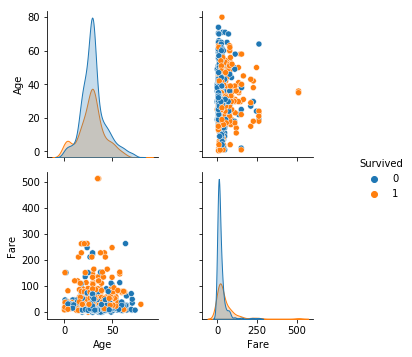

In [30]:
num=['Age', 'Fare','Survived']
sns.pairplot(df[num], hue='Survived', size=2.5);

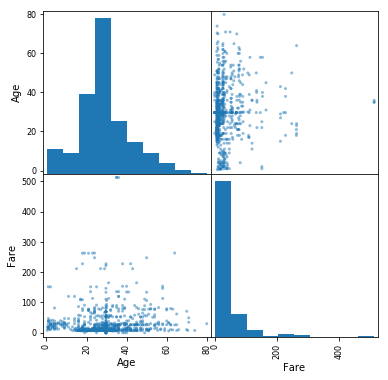

In [31]:
num=['Age', 'Fare']
scatter_matrix(df[num],figsize=(6,6))
plt.show()

there seems to be no relationship between age and fare

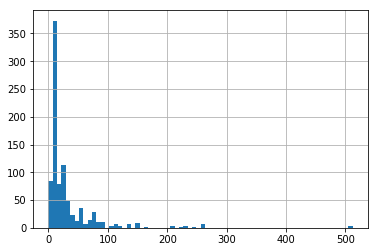

In [32]:
df.Fare.hist(bins=70)
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, N

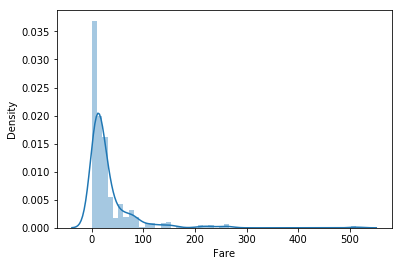

In [33]:
sns.distplot(df.Fare)
plt.show()

the distribution for fare is skewed to the right which seems to be an indication that most of the passengers who survived were passengers in the 1st class group ( ordered to be the lowest when converting pclass in ordinal data type)

In [34]:
sns.__version__

'0.11.0'

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


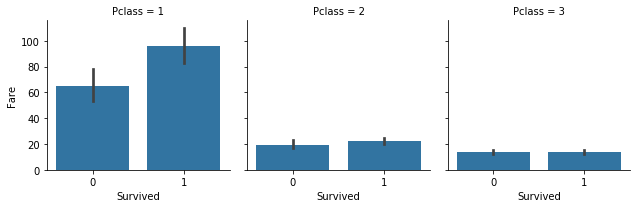

In [35]:
g=sns.FacetGrid(df,col='Pclass')
g.map(sns.barplot ,'Survived','Fare')
plt.show()

this results confirm our assumption that most survived passengers were first classed passengers

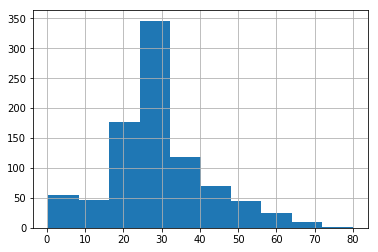

In [36]:
# the distribution of age seems to be normally distributed
df.Age.hist()
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, N

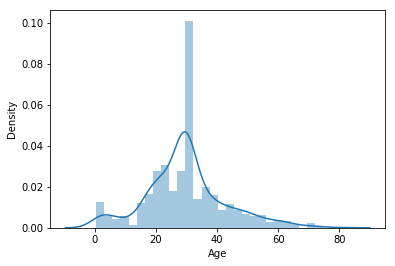

In [37]:
sns.distplot(df.Age)
plt.show()

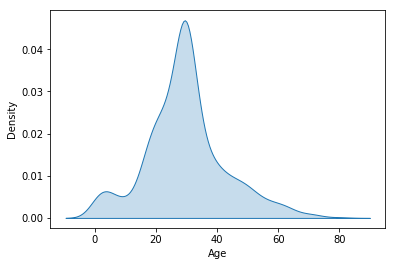

In [38]:
sns.kdeplot(df.Age,shade=True)
plt.show()

In [39]:
print('passengers who did not survived constitute {} of the total data set \n \n while {} is for survived passengers'
      .format(np.round((549 /len(df))*100,2),np.round((342 /len(df))*100,2)))

passengers who did not survived constitute 61.62 of the total data set 
 
 while 38.38 is for survived passengers


the data seems to be an unbalanced data set (we will deal with that later) since the perished class is almost 2 times that of the survived class

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


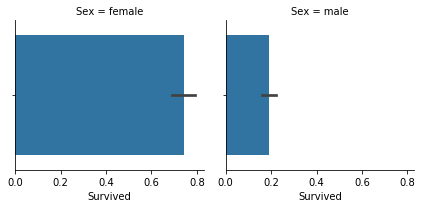

In [40]:
g=sns.FacetGrid(df,col='Sex')
g.map(sns.barplot ,'Survived')
plt.show()

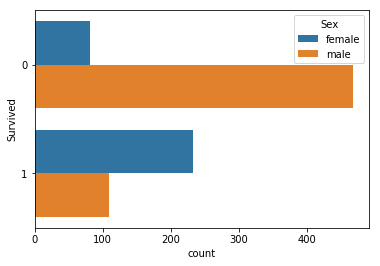

In [41]:
sns.countplot(hue='Sex',y='Survived',data=df)

# more females survived than their male counterpart

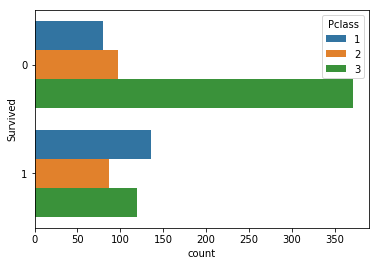

In [42]:
sns.countplot(hue='Pclass',y='Survived',data=df)

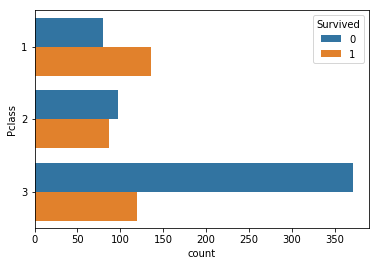

In [43]:
sns.countplot(y='Pclass',hue='Survived',data=df)

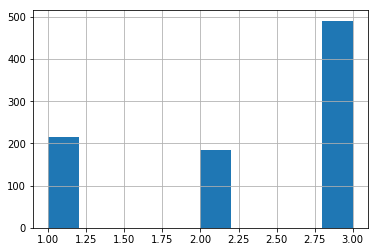

In [44]:
df.Pclass.hist()
plt.show()

most passengers were 3rd class passengers

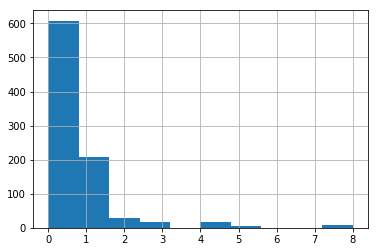

In [45]:
df.SibSp.hist()
plt.show()

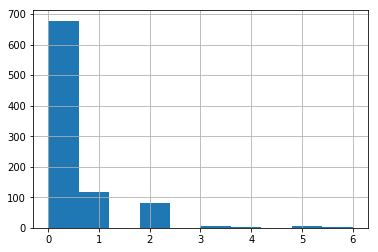

In [46]:
df.Parch.hist()
plt.show()

<Figure size 504x432 with 0 Axes>

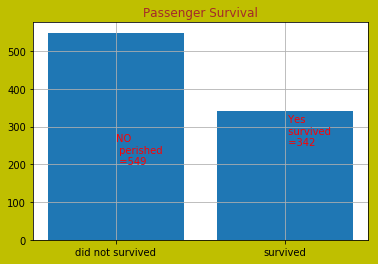

In [47]:
name=['did not survived','survived']
def plot_target_classes(names=None,data=None,colors='green'):
    plt.figure(figsize=(7,6))
    fig, ax = plt.subplots(facecolor='y')
 #   plt.figure(figsize=(5,4))
    ax.bar(names,data)
    ax.text(1,250,' Yes \n survived \n =342',color='red')
    ax.text(0,200,'NO \n perished \n =549',color='red')
    plt.title('Passenger Survival',color='brown')
    ax.grid(True)
    plt.show()
    
plot_target_classes(name,df.Survived.value_counts())

the data seems to be an unbalanced date set with  38.38% ((342 / len(df)) *100)  representing the survived class and 
61.62 for the perished class.  building a model with this dataset will likely ignore the minority class( survived) in it's prediction

# UP SAMPLING MINORITY CLASS
UP sampling the minority class by randomly duplicating the minority class to have the same number of observation as that of the 
majority class.
There are several method but i will be using sampling with replacement

In [48]:
#df_minority=df[df.Survived==1]
#df_majority=df[df.Survived==0]
df_minority=df[df['Survived']==1]
df_majority=df[df['Survived']==0]

In [49]:
df_minority.shape,df_majority.shape

((342, 8), (549, 8))

In [50]:
upsmaple_minority=resample(df_minority,replace=True,n_samples=549,random_state=1000)

In [51]:
upsmaple_minority.shape

(549, 8)

In [52]:
# pd.concat use FULL (OUTER) JOIN: Return all records when there is a match in either left or right table
df_balanced=pd.concat([df_majority,upsmaple_minority])

In [53]:
df_balanced.tail(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
286,1,3,male,30.000000,0,0,9.5000,S
370,1,1,male,25.000000,1,0,55.4417,C
78,1,2,male,0.830000,0,2,29.0000,S
751,1,3,male,6.000000,0,1,12.4750,S
576,1,2,female,34.000000,0,0,13.0000,S
36,1,3,male,29.699118,0,0,7.2292,C
142,1,3,female,24.000000,1,0,15.8500,S
387,1,2,female,36.000000,0,0,13.0000,S
416,1,2,female,34.000000,1,1,32.5000,S
621,1,1,male,42.000000,1,0,52.5542,S


In [54]:
df_balanced.shape

(1098, 8)

In [57]:
df_balanced=np.random.permutation(df_balanced)

In [58]:
# converting the data into a dataframe
df_balanced=pd.DataFrame(df_balanced,columns=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked'])

In [59]:
df_balanced.head(7)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,29.6991,0,0,7.8958,S
1,1,2,female,55,0,0,16,S
2,0,3,male,19,0,0,8.05,S
3,0,3,male,33,0,0,7.8958,C
4,0,3,male,19,0,0,7.8958,S
5,1,1,female,30,0,0,86.5,S
6,1,2,female,24,0,2,14.5,S


# scaling the numerical feature

In [60]:
# rearranging the columns so that the target variable will be the last column
cols=[col for col in df_balanced if col != 'Survived']+['Survived']
df_balanced=df_balanced[cols]
df_balanced.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,29.6991,0,0,7.8958,S,0
1,2,female,55,0,0,16,S,1
2,3,male,19,0,0,8.05,S,0
3,3,male,33,0,0,7.8958,C,0
4,3,male,19,0,0,7.8958,S,0


In [61]:
df_balanced['SibSp']=pd.Categorical(df_balanced.SibSp,ordered=True,categories=[0,1, 2,3, 4,5, 8])
df_balanced['Parch']=pd.Categorical(df_balanced.Parch,ordered=True,categories=[0, 1, 2,3,4, 5, 6])
# converting the data type to float64
df_balanced[['Age', 'Fare']]=df_balanced[['Age', 'Fare']].astype('float64')
cat=['Survived','Pclass','Sex','Embarked']
for i in cat:
    df_balanced[i]=pd.Categorical(df_balanced[i]) 

In [62]:
d=df_balanced[1:3]
d

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
1,2,female,55.0,0,0,16.00,S,1
2,3,male,19.0,0,0,8.05,S,0


In [63]:
y=df_balanced.iloc[:,-1]
X=df_balanced.iloc[:,:-1]

In [64]:
y.shape,X.shape

((1098,), (1098, 7))

In [65]:
X.dtypes

Pclass      category
Sex         category
Age          float64
SibSp       category
Parch       category
Fare         float64
Embarked    category
dtype: object

In [66]:
X.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,29.699118,0,0,7.8958,S
1,2,female,55.000000,0,0,16.0000,S


In [68]:
# scaling the features
X[['Age', 'Fare']]=preprocessing.StandardScaler().fit_transform(X[['Age', 'Fare']])

In [69]:
d=df_balanced[['Age', 'Fare']]

In [70]:
X.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,0.042552,0,0,-0.534413,S
1,2,female,2.003740,0,0,-0.375336,S
2,3,male,-0.786786,0,0,-0.531387,S


In [71]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
X_train.shape,X_test.shape

((768, 7), (330, 7))

In [73]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
593,3,female,0.042552,1,2,-0.229099,S
305,3,female,-0.864301,1,0,-0.340003,S
355,1,female,0.453448,1,0,0.949134,S
1067,3,female,-2.104535,0,1,-0.448209,S
1043,2,female,1.616167,0,1,-0.179045,S


In [74]:
X_train.Embarked=X_train.Embarked.cat.codes
X_test.Embarked=X_test.Embarked.cat.codes
X_train.Sex=X_train.Sex.cat.codes
X_test.Sex=X_test.Sex.cat.codes

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [75]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
593,3,0,0.042552,1,2,-0.229099,2
305,3,0,-0.864301,1,0,-0.340003,2
355,1,0,0.453448,1,0,0.949134,2
1067,3,0,-2.104535,0,1,-0.448209,2
1043,2,0,1.616167,0,1,-0.179045,2


In [76]:
lda=LinearDiscriminantAnalysis(n_components=1)

In [77]:
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=1)

In [78]:
y_pred=lda.predict(X_test)

In [79]:
accuracy_score(y_pred,y_test)

0.806060606060606

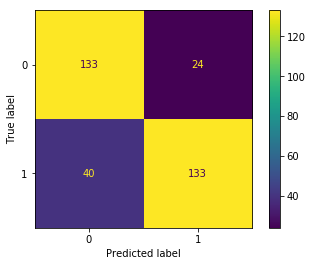

In [80]:
plot_confusion_matrix(lda,X_test,y_test)
plt.show()

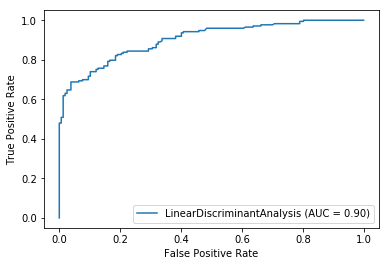

In [81]:
plot_roc_curve(lda,X_test,y_test)
plt.show()

In [82]:
confusion_matrix(y_test,y_pred)

array([[133,  24],
       [ 40, 133]], dtype=int64)

## QUADRATIC DISCRIMINANT ANALYSIS

In [83]:
qda=QuadraticDiscriminantAnalysis()

In [84]:
qda.fit(X_train,y_train)

QuadraticDiscriminantAnalysis()

In [85]:
q_pred=qda.predict(X_test)

In [87]:
accuracy_score(y_test,q_pred)

0.8303030303030303

In [88]:
confusion_matrix(y_test,q_pred)

array([[139,  18],
       [ 38, 135]], dtype=int64)

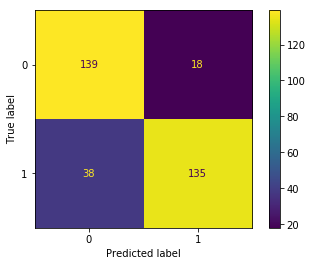

In [89]:
plot_confusion_matrix(qda,X_test,y_test)

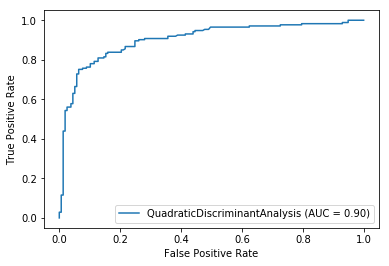

In [90]:
plot_roc_curve(qda,X_test,y_test)